In [1]:
import pandas as pd
import csv
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize 
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer




/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
#conversion of xlsx file into csv file



data_xls = pd.read_excel('dataset.xlsx', index_col=None)
data_xls.to_csv('dataset.csv', encoding='utf-8', index=False)    

In [2]:
#counting samples for each category in CSV

data = pd.read_csv('Dataset2.csv', engine='python')
minimum = 999
maximum = 0

ids = [19, 22, 2, 30, 23, 31, 9, 11, 33, 15, 1, 35, 24, 29, 6, 17, 32, 4, 21, 5, 16, 10, 27, 8, 7, 14, 12]
ids.sort()
print(ids)

for id in ids:
    print ('\nThe no. of samples for category %d is : %d' % (id, len(data[data['category_id'] == id])))
    
    if minimum>len(data[data['category_id']==id]):
       minimum = len(data[data['category_id']==id])
       id_min = id
       #print(min)
        
    if maximum<len(data[data['category_id']==id]):
       maximum = len(data[data['category_id']==id]) 
       id_max = id
       #print(max)
                      
print('\nThe category %d has the minimum number of samples of %d' % (id_min, minimum)) 
print('\nThe category %d has the maximum number of samples of %d' % (id_max, maximum))                      

[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 21, 22, 23, 24, 27, 29, 30, 31, 32, 33, 35]

The no. of samples for category 1 is : 34

The no. of samples for category 2 is : 79

The no. of samples for category 4 is : 41

The no. of samples for category 5 is : 38

The no. of samples for category 6 is : 88

The no. of samples for category 7 is : 33

The no. of samples for category 8 is : 41

The no. of samples for category 9 is : 94

The no. of samples for category 10 is : 34

The no. of samples for category 11 is : 92

The no. of samples for category 12 is : 35

The no. of samples for category 14 is : 36

The no. of samples for category 15 is : 40

The no. of samples for category 16 is : 36

The no. of samples for category 17 is : 40

The no. of samples for category 19 is : 91

The no. of samples for category 21 is : 32

The no. of samples for category 22 is : 92

The no. of samples for category 23 is : 89

The no. of samples for category 24 is : 33

The no. of samples for cat

In [3]:
#shuffle all the rows of the csv

#data = pd.read_csv('Dataset2.csv', engine='python')
data = data.sample(frac=1)
data.to_csv('dataset.csv', encoding='utf-8', index=False)

In [5]:
#deletion of all the rows whose 'category_id' column is empty



rows = csv.reader(open('dataset.csv', 'r'))
newrows = []

for row in rows:
     if row[2]!='':
        newrows.append(row)
        
writer = csv.writer(open('dataset.csv', 'w'))  
writer.writerows(newrows)

In [4]:
#data = pd.read_csv("dataset.csv")
data[pd.to_numeric(data['category_id'], errors='coerce').notnull()]


#data = data[np.isfinite(data['category_id'], errors='coerce')]
data = data[data['category_id'].notnull()]

data['category_id'] = np.array(data['category_id'], dtype=int)
data = data[np.isfinite(data['category_id'])]

print(data.category_id.dtype)

#data.to_csv('dataset.csv', encoding='utf-8', index=False)

#df[pd.to_numeric(df['id'], errors='coerce').notnull()]

int64


In [5]:
#deduplication of data in the csv

#data = pd.read_csv("dataset.csv") 
print(data.shape)

#data.head() #to see the first 5 rows in the csv file
#data.description[2] #to see the content of description field in the 3rd row

#deduped_data = data.drop_duplicates(subset={"event_name", "category", "description"}, keep='first', inplace=False) #as inplace is set to false, it does not effect the main dataframe
data.drop_duplicates(subset={"event_name", "category", "description"}, keep='first', inplace=True)
print(data.shape)

#data.to_csv('dataset.csv', encoding='utf-8', index=False) 

data.description[679]

(1445, 6)
(1418, 6)


'ELP Fest - Eat. Love. Party. One of the biggest Fests of the country, ELP is known to be the first of its kind International Food festival in India! After the huge success of the previous edition, this Season is set be a grand excuse to eat, drink and dance the weekend away at the most awaited food and music festival this December. The visitors are offered a combination of top class food and a smashing line up of live music. Presenting a combination of food-tasting events, culinary experiences, stand-up comedy, and celebrity artists performances, the city will come alive like never before.'

In [6]:
#removal of rows in dataframe that have NaN values in 'category_id' column

print(data.category_id)
print('---------------------------------------------------------')
#data = data[np.isfinite(data['category_id'])]
data = data[data['category_id'].notnull()]
print(data.category_id)
print('---------------------------------------------------------')
print(data['category_id'].shape)
data.to_csv('dataset.csv', encoding='utf-8', index=False)
print('---------------------------------------------------------')
print(type(data['category_id']))
print('---------------------------------------------------------')
print(data.category_id.dtype)

1443    12
867     33
612     29
203     30
954     32
324     22
287     22
244     30
1266    27
490     11
1423    12
701      9
760      6
186      2
643      9
1163     5
554     35
1043    19
627     29
1304     8
1402    14
31      15
1110     4
1306     8
1071    19
91      31
1066    19
943     17
230     30
192      2
        ..
278     22
905     33
576     24
793      6
1138    21
580     24
447     11
142      2
1192    16
337     22
1326     8
652      9
717      9
980     32
557     35
146      2
1152     5
1340     8
552     35
1218    16
1270    27
45      15
577     24
473     11
430     23
926     17
65       1
469     11
524     11
137      2
Name: category_id, Length: 1444, dtype: int64
---------------------------------------------------------
1443    12
867     33
612     29
203     30
954     32
324     22
287     22
244     30
1266    27
490     11
1423    12
701      9
760      6
186      2
643      9
1163     5
554     35
1043    19
627     29
1304     8
1402 

In [7]:
#selecting rows of the dataset whose 'category' column has values mentioned in a list

#categories = ['Science & Technology','Business', 'Nightlife', 'Sports & Fitness', 'outdoor']
category_ids = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 21, 22, 23, 24, 27, 29, 30, 31, 32, 33, 35]
#categories = ['hobbies']
data = data[data.category_id.isin(category_ids)]
#data = data[~data.category.isin(categories)]
print(data.shape) 

#data.to_csv('dataset.csv', encoding='utf-8', index=False)

(1444, 6)


In [8]:
#removal of unreadable chars, unwanted spaces, words of at most length two from 'description', 'event_name' columns and lowercase the 'description' and 'event_name' columns

def data_preprocessing(source):
    
    source = source.str.replace('[^A-Za-z]',' ')
    #data['description'] = data['description'].str.replace('\W+',' ')
    source = source.str.lower()
    source = source.str.replace("\s\s+" , " ")
    source = source.str.replace('\s+[a-z]{1,2}(?!\S)',' ')
    source = source.str.replace("\s\s+" , " ")
    return source
    



In [9]:

data['description'] = data_preprocessing(data['description'])
data['event_name'] = data_preprocessing(data['event_name'])

#data.to_csv('dataset.csv', encoding='utf-8', index=False)

print(data.event_name[679])
print('---------------------------------------------------------')
print(data.description[679])
print('---------------------------------------------------------')
print(type(data.description[679]))
print('---------------------------------------------------------')
print(type(data.event_name[679]))

elp festival
---------------------------------------------------------
elp fest eat love party one the biggest fests the country elp known the first its kind international food festival india after the huge success the previous edition this season set grand excuse eat drink and dance the weekend away the most awaited food and music festival this december the visitors are offered combination top class food and smashing line live music presenting combination food tasting events culinary experiences stand comedy and celebrity artists performances the city will come alive like never before 
---------------------------------------------------------
<class 'str'>
---------------------------------------------------------
<class 'str'>


In [10]:
#function for removal of stop words and stemming of words

nltk.download('stopwords')
sno = nltk.stem.SnowballStemmer('english')

print('---------------------------------------------------------')
stop_words = stopwords.words('english')
print(stop_words)
print('---------------------------------------------------------')

def stop_word_removal_stemming(source):
    source = source.str.split()
    f = lambda x: [item for item in x if item not in stop_words] if isinstance(x, list) else [] # empty lists for missing values
    source = source.apply(f)
    source = source.apply(lambda x: [sno.stem(y) for y in x])
    source = source.apply(' '.join)
    return source

[nltk_data] Downloading package stopwords to /home/hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
---------------------------------------------------------
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'her

In [11]:
data['description'] = stop_word_removal_stemming(data['description'])
data['event_name'] = stop_word_removal_stemming(data['event_name'])

#data.to_csv('dataset.csv', encoding='utf-8', index=False)

print(data.description[679])
print('---------------------------------------------------------')
print(data.event_name[679])

elp fest eat love parti one biggest fest countri elp known first kind intern food festiv india huge success previous edit season set grand excus eat drink danc weekend away await food music festiv decemb visitor offer combin top class food smash line live music present combin food tast event culinari experi stand comedi celebr artist perform citi come aliv like never
---------------------------------------------------------
elp festiv


In [12]:
#removal of rows in dataframe that have NaN values in 'category_id' column

print(data.category_id)
print('---------------------------------------------------------')
'''data = data[np.isfinite(data['category_id'])]
print(data.category_id)
print('---------------------------------------------------------')
print(data['category_id'].shape)'''


1443    12
867     33
612     29
203     30
954     32
324     22
287     22
244     30
1266    27
490     11
1423    12
701      9
760      6
186      2
643      9
1163     5
554     35
1043    19
627     29
1304     8
1402    14
31      15
1110     4
1306     8
1071    19
91      31
1066    19
943     17
230     30
192      2
        ..
278     22
905     33
576     24
793      6
1138    21
580     24
447     11
142      2
1192    16
337     22
1326     8
652      9
717      9
980     32
557     35
146      2
1152     5
1340     8
552     35
1218    16
1270    27
45      15
577     24
473     11
430     23
926     17
65       1
469     11
524     11
137      2
Name: category_id, Length: 1444, dtype: int64
---------------------------------------------------------


"data = data[np.isfinite(data['category_id'])]\nprint(data.category_id)\nprint('---------------------------------------------------------')\nprint(data['category_id'].shape)"

In [13]:
data['event_name_description'] = data['event_name'].astype(str) + ' ' + data['description'].astype(str)
print(data.event_name_description)

1443    earli modern german histori earli modern germa...
867     chopin one piano recit concert pianist natalli...
612     onlin classroom demo data scienc onlin classro...
203     wonder women ladi night oct ladi present incre...
954     dahod audit season saregama gujarat organ sare...
324     merced amg drive benchmark car merced benz ben...
287     nep tech transfer fall san francisco estuari p...
244     wednesday ladi night cloudnyn redeyez event we...
1266    loft fantast friday featur felix kolkata fanta...
490     intro session transcendent medit shalimar bagh...
1423    live histori fli day live histori fli day day ...
701     chocol make beginn workshop bangalor chocol ma...
760     sire fashion lifestyl exhibit ahmedabad sire e...
186     creativ cultur busi programm organ iima offer ...
643     mangalorean oota savor chef shriya would like ...
1163    apart activ kid bangalor group kid interest hi...
554     day celebr day celebr batch senanayak colleg p...
1043    monsoo

In [15]:
#splitting dataframe into train set and test set

'''x = np.array(data['description'])
print(x.shape)
print(x)
print('---------------------------------------------------------')

y = np.array(data['category_id'])
print(y.shape)
print(y)
print('---------------------------------------------------------')'''

x_train, x_test, y_train, y_test = cross_validation.train_test_split(data['event_name_description'], data['category_id'], test_size=0.2, random_state=42)
print(x_train)
print('---------------------------------------------------------')
print(y_train)
print('---------------------------------------------------------')
print(x_test)
print('---------------------------------------------------------')
print(y_test)
print('---------------------------------------------------------')
print(y_test.shape)

146     nation achiev confer sep speaker day rajiv int...
635     onlin offlin bridg build join knowledg share i...
1027    hous malgudi part malleswaram anoth popular wa...
1078    blood donat camp donat blood save life organ s...
464     yoga breakfast morn start weekend immers hatha...
188     learn start export import bsuiness one day pra...
1335    swathanthryam ardharathriyil mumbai special sc...
418     oxfam trailwalk bengaluru readi part india big...
14      bigmic poetri open mic host shaurya shah great...
152     iimbu iimb leadership summit exclus iimb alumn...
976     monocrom watercolour workshop monocrom waterco...
1320    intern youth film festiv nation youth foundat ...
154     live one day digit market workshop day digit m...
1075    blood donat camp come support organ praya ray ...
690     cake bake workshop eggless workshop simpl cake...
646     sunday italian drunch gorgeous itali known dra...
652     juhu shopper saturday invit diwali edit juhu s...
1097    donat 

In [15]:
#production of bag of words from x_train

count_vect = CountVectorizer()
#final_counts = count_vect.fit_transform(data['description'].values.astype('U'))
x_train_counts = count_vect.fit_transform(x_train)
train_vocab = count_vect.get_feature_names()
print(type(x_train_counts)) #final_counts is a sparse matrix
print("--------------------------------------------------------------")
print(x_train_counts.shape)
print("--------------------------------------------------------------")
#print(x_train_counts.toarray())
#print("--------------------------------------------------------------")
print(x_train_counts[0].shape)
print("--------------------------------------------------------------")
print(x_train_counts[0])
print("--------------------------------------------------------------")
print(x_train_counts[0].toarray())
print("--------------------------------------------------------------")
print(train_vocab)
print("--------------------------------------------------------------")
print(len(train_vocab))
print("--------------------------------------------------------------")





#print("--------------------------------------------------------------")
#print(vocab.toarray())

# Sum up the counts of each vocabulary word
#dist = np.sum(final_counts, axis=0)

# For each, print the vocabulary word and the number of times it appears in the training set
#for tag, count in zip(vocab, dist):
    #print(count, tag)

<class 'scipy.sparse.csr.csr_matrix'>
--------------------------------------------------------------
(1133, 11935)
--------------------------------------------------------------
(1, 11935)
--------------------------------------------------------------
  (0, 8941)	1
  (0, 6410)	1
  (0, 11339)	1
  (0, 10750)	1
  (0, 2546)	1
  (0, 3248)	1
  (0, 1578)	1
  (0, 8427)	1
  (0, 3631)	1
  (0, 2669)	1
  (0, 2710)	1
  (0, 7637)	1
  (0, 293)	1
  (0, 6508)	1
  (0, 11192)	1
  (0, 1664)	2
  (0, 6149)	1
  (0, 10164)	1
  (0, 4965)	1
  (0, 8813)	1
  (0, 10812)	2
  (0, 10087)	1
  (0, 5047)	1
  (0, 9511)	1
  (0, 1656)	1
  :	:
  (0, 7786)	1
  (0, 10695)	1
  (0, 3322)	1
  (0, 3837)	2
  (0, 4699)	1
  (0, 9742)	1
  (0, 9877)	1
  (0, 8726)	1
  (0, 5404)	4
  (0, 11423)	2
  (0, 616)	3
  (0, 11760)	1
  (0, 3464)	1
  (0, 6341)	1
  (0, 2165)	1
  (0, 6478)	1
  (0, 8841)	1
  (0, 3585)	1
  (0, 1083)	2
  (0, 828)	1
  (0, 2084)	1
  (0, 5221)	1
  (0, 2315)	3
  (0, 1579)	9
  (0, 972)	2
-------------------------------------

In [16]:
#production of bag of words from x_test

x_test_counts = count_vect.transform(x_test)
test_vocab = count_vect.get_feature_names()
print(type(x_test_counts)) #final_counts is a sparse matrix
print("--------------------------------------------------------------")
print(x_test_counts.shape)
print("--------------------------------------------------------------")
#print(x_train_counts.toarray())
#print("--------------------------------------------------------------")
print(x_test_counts[0].shape)
print("--------------------------------------------------------------")
print(x_test_counts[0])
print("--------------------------------------------------------------")
print(x_test_counts[0].toarray())
print("--------------------------------------------------------------")
print(test_vocab)
print("--------------------------------------------------------------")
print(len(test_vocab))
print("--------------------------------------------------------------")

<class 'scipy.sparse.csr.csr_matrix'>
--------------------------------------------------------------
(284, 11935)
--------------------------------------------------------------
(1, 11935)
--------------------------------------------------------------
  (0, 72)	1
  (0, 1074)	2
  (0, 1090)	1
  (0, 1316)	1
  (0, 1628)	2
  (0, 2699)	1
  (0, 3501)	1
  (0, 3725)	5
  (0, 4103)	1
  (0, 4324)	1
  (0, 4978)	1
  (0, 5667)	1
  (0, 5951)	1
  (0, 5989)	1
  (0, 6276)	1
  (0, 6371)	1
  (0, 6606)	1
  (0, 7174)	1
  (0, 7330)	1
  (0, 7677)	4
  (0, 8190)	1
  (0, 8631)	1
  (0, 9008)	1
  (0, 9331)	1
  (0, 9468)	1
  (0, 9487)	1
  (0, 10750)	3
  (0, 11757)	1
--------------------------------------------------------------
[[0 0 0 ... 0 0 0]]
--------------------------------------------------------------
['aaannnd', 'aadha', 'aadmi', 'aadya', 'aadyashakti', 'aahvan', 'aahwal', 'aakanksha', 'aakansha', 'aamer', 'aamhi', 'aana', 'aap', 'aapk', 'aaradhana', 'aarogyaseva', 'aaron', 'aarti', 'aashini', 'aashram', 'aa

In [16]:
#production of tf-idf from x_train

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
x_train_counts = tf_idf_vect.fit_transform(x_train)
train_vocab = tf_idf_vect.get_feature_names()
print(type(x_train_counts)) #final_counts is a sparse matrix
print("--------------------------------------------------------------")
print(x_train_counts.shape)
print("--------------------------------------------------------------")
#print(x_train_counts.toarray())
#print("--------------------------------------------------------------")
print(x_train_counts[0].shape)
print("--------------------------------------------------------------")
print(x_train_counts[0])
print("--------------------------------------------------------------")
print(x_train_counts[0].toarray())
print("--------------------------------------------------------------")
print(train_vocab)
print("--------------------------------------------------------------")
print(len(train_vocab))
print("--------------------------------------------------------------")

<class 'scipy.sparse.csr.csr_matrix'>
--------------------------------------------------------------
(1155, 90518)
--------------------------------------------------------------
(1, 90518)
--------------------------------------------------------------
  (0, 53493)	0.024380832171872622
  (0, 547)	0.058234953809886636
  (0, 16324)	0.02525277834392526
  (0, 71255)	0.032530938064607225
  (0, 74775)	0.12146582717650795
  (0, 19866)	0.015218528263744091
  (0, 65205)	0.08946971860902019
  (0, 41012)	0.10993744793005082
  (0, 8013)	0.1286527160666718
  (0, 5260)	0.0932864555863644
  (0, 33852)	0.024850593179797802
  (0, 39446)	0.06773001496669309
  (0, 45171)	0.04585456804787297
  (0, 10571)	0.15615319143850195
  (0, 14562)	0.0918012150764616
  (0, 2586)	0.04734316256645607
  (0, 9295)	0.020845942745819752
  (0, 81493)	0.03191782031930925
  (0, 8824)	0.04473485930451009
  (0, 25594)	0.12056287595235171
  (0, 17450)	0.027458896441743777
  (0, 45256)	0.029117476904943318
  (0, 76334)	0.062716175

In [17]:
#production of tf-idf from x_test

x_test_counts = tf_idf_vect.transform(x_test)
test_vocab = tf_idf_vect.get_feature_names()
print(type(x_test_counts)) #final_counts is a sparse matrix
print("--------------------------------------------------------------")
print(x_test_counts.shape)
print("--------------------------------------------------------------")
#print(x_train_counts.toarray())
#print("--------------------------------------------------------------")
print(x_test_counts[153].shape)
print("--------------------------------------------------------------")
print(x_test_counts[153])
print("--------------------------------------------------------------")
print(x_test_counts[153].toarray())
print("--------------------------------------------------------------")
print(test_vocab)
print("--------------------------------------------------------------")
print(len(test_vocab))
print("--------------------------------------------------------------")

<class 'scipy.sparse.csr.csr_matrix'>
--------------------------------------------------------------
(289, 90518)
--------------------------------------------------------------
(1, 90518)
--------------------------------------------------------------
  (0, 90276)	0.13591409582085112
  (0, 90258)	0.08652883218154182
  (0, 87941)	0.11031248518477993
  (0, 87922)	0.07968889559684436
  (0, 85711)	0.13591409582085112
  (0, 85538)	0.19740711045127585
  (0, 82137)	0.07722288345862595
  (0, 79437)	0.1800473775533231
  (0, 77363)	0.07079047442726527
  (0, 75955)	0.0878485119145316
  (0, 75810)	0.11285618431202801
  (0, 70652)	0.12311329050281553
  (0, 68288)	0.06481088530879477
  (0, 68083)	0.06849498666176551
  (0, 63878)	0.10813730832264996
  (0, 63457)	0.11562529941273274
  (0, 63327)	0.06259210120479364
  (0, 59307)	0.12842610473076835
  (0, 59236)	0.11517344479277118
  (0, 58736)	0.08359127974530088
  (0, 56483)	0.06241869468800149
  (0, 55152)	0.10619154631572071
  (0, 54153)	0.0529160323

In [18]:
print(type(x_train_counts))
print(type(y_train))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'pandas.core.series.Series'>



The optimal value of alpha for accuracy is 0.132600


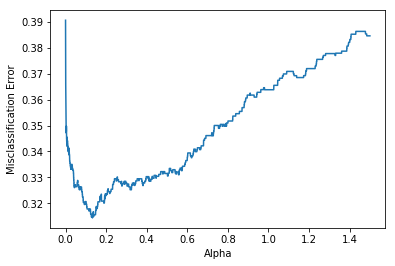

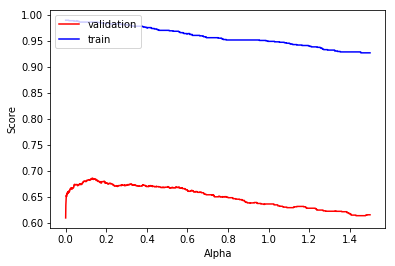

In [18]:
#training the classifier for accuracy metric with bag of words

alphas = list(np.arange(0.0001, 1.5000, 0.0001))

#perform k fold cross validation for different metrics
MSE = []
cv_scores = []
training_scores = []
   
for alpha in alphas:
    naive_bayes = MultinomialNB(alpha=alpha)
    #naive_bayes.fit(x_train_counts, y_train)
    scores = cross_val_score(naive_bayes, x_train_counts, y_train, cv=20, scoring='accuracy')                           
    #score() returns the mean accuracy on the given test data and labels
    scores_training = naive_bayes.fit(x_train_counts, y_train).score(x_train_counts, y_train)

    cv_scores.append(scores.mean())
    training_scores.append(scores_training)
    
#changing to misclassification error
MSE = [1 - x for x in cv_scores]  

#determining best alpha
optimal_alpha = alphas[MSE.index(min(MSE))]
print('\nThe optimal value of alpha for accuracy is %f' % optimal_alpha)

#print("the misclassification error for each alpha value is : ", np.round(MSE,5))
#plot misclassification error vs alpha for BoW
plt.plot(alphas, MSE)
plt.xlabel('Alpha')
plt.ylabel('Misclassification Error')
plt.show()

#plot cross-validated score, training score vs alpha for BoW
#print(cv_scores)
#print(training_scores)
plt.plot(alphas, cv_scores, 'r', label='Validation')
plt.plot(alphas, training_scores, 'b', label='Train')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend(['validation', 'train'], loc='upper left')
plt.show()



In [19]:
multinomial_naive_bayes_optimal = MultinomialNB(alpha=optimal_alpha)

# fitting the model
multinomial_naive_bayes_optimal.fit(x_train_counts, y_train)

#predict the response
category_predicted = multinomial_naive_bayes_optimal.predict(x_test_counts)
    
# evaluate accuracy
acc = accuracy_score(y_test, category_predicted) * 100
print('\nThe accuracy of the Multinomial Naive Bayes classifier for alpha = %f is %f' % (optimal_alpha, acc))



The accuracy of the Multinomial Naive Bayes classifier for alpha = 0.132600 is 73.591549


In [20]:
print(len(category_predicted))
print(len(y_test))
df = pd.DataFrame()
#df['Y_test']  = y_test
#category_predicted = np.array(category_predicted)
#categor_trans = category_predicted.transpose()
df['Y_test']  = y_test
df['category_predicted'] = category_predicted

print(df)

acc = accuracy_score(y_test, category_predicted) * 100
print('\nAccuracy is %f' % acc)
df.to_csv('data_predicted_accuracy.csv', encoding='utf-8', index=False)

#print(type(category_predicted))

284
284
      Y_test  category_predicted
425       23                  30
1148       5                   8
512       11                  11
1441      12                  12
1102       4                   4
136        2                   2
778        6                   6
204       30                  30
1069      19                  19
749        6                   6
656        9                   9
886       33                  33
1290      27                  11
1128      21                   2
551       35                  24
644        9                   9
1181       5                   5
503       11                  11
541       35                   8
982       32                  32
1285      27                   7
948       32                  30
1218      16                  21
815        6                   6
1354       7                   7
483       11                  11
328       22                  22
78         1                   9
637        9                   9
99


The optimal value of alpha for accuracy is 0.010700


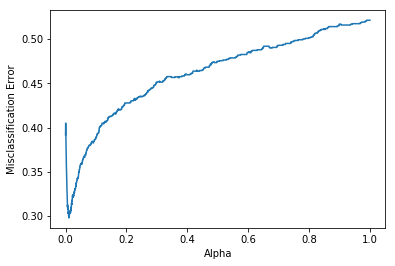

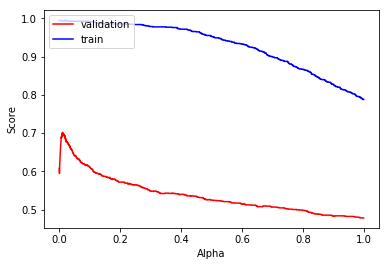

In [19]:
#training the classifier for accuracy metric with tf-idf

alphas = list(np.arange(0.0001, 1.0000, 0.0001))

#perform k fold cross validation for different metrics
MSE = []
cv_scores = []
training_scores = []
   
for alpha in alphas:
    naive_bayes = MultinomialNB(alpha=alpha)
    #naive_bayes.fit(x_train_counts, y_train)
    scores = cross_val_score(naive_bayes, x_train_counts, y_train, cv=20, scoring='accuracy')                           
    #score() returns the mean accuracy on the given test data and labels
    scores_training = naive_bayes.fit(x_train_counts, y_train).score(x_train_counts, y_train)

    cv_scores.append(scores.mean())
    training_scores.append(scores_training)
    
#changing to misclassification error
MSE = [1 - x for x in cv_scores]  

#determining best alpha
optimal_alpha = alphas[MSE.index(min(MSE))]
print('\nThe optimal value of alpha for accuracy is %f' % optimal_alpha)

#print("the misclassification error for each alpha value is : ", np.round(MSE,5))
#plot misclassification error vs alpha for BoW
plt.plot(alphas, MSE)
plt.xlabel('Alpha')
plt.ylabel('Misclassification Error')
plt.show()

#plot cross-validated score, training score vs alpha for BoW
#print(cv_scores)
#print(training_scores)
plt.plot(alphas, cv_scores, 'r', label='Validation')
plt.plot(alphas, training_scores, 'b', label='Train')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend(['validation', 'train'], loc='upper left')
plt.show()


In [20]:
# ============================== Multinomial Naive Bayes with alpha = optimal_alpha ===============================================

# instantiate learning model alpha found with tf-idf = optimal_alpha
multinomial_naive_bayes_optimal = MultinomialNB(alpha=optimal_alpha)

# fitting the model
multinomial_naive_bayes_optimal.fit(x_train_counts, y_train)

# predict the response
pred = multinomial_naive_bayes_optimal.predict(x_test_counts)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the Multinomial Naive Bayes classifier for alpha = %f is %f using tf-idf' % (optimal_alpha, acc))


The accuracy of the Multinomial Naive Bayes classifier for alpha = 0.010700 is 69.204152 using tf-idf


In [24]:
#print(len(category_predicted))
print(len(y_test))
df = pd.DataFrame()
#df['Y_test']  = y_test
#category_predicted = np.array(category_predicted)
#categor_trans = category_predicted.transpose()
df['Y_test']  = y_test
df['Category_predicted'] = pred

print(df)

acc = accuracy_score(y_test, pred) * 100
print('\nAccuracy is %f with tf-idf' % acc)
df.to_csv('data_predicted_accuracy.csv', encoding='utf-8', index=False)

289
      Y_test  Category_predicted
504       11                  11
583       24                  22
898       33                  33
1283      27                  27
1417      12                  22
85        31                  22
26        15                  15
685        9                   9
631       29                  35
51         1                   1
1072      19                  19
1182       5                   5
656        9                   9
426       23                  19
879       33                  30
1080       4                  11
126        2                  11
276       22                  22
1259      27                  30
1161       5                   1
151        2                   2
322       22                  33
1406      14                  14
536       11                  11
327       22                  22
1353       7                   7
1051      19                  19
166        2                  22
1179       5                   5
978   